# Analysis part - Blastoise___Holo_1999_Base_Set

In [1]:
library(ggplot2)
library(quantreg)


df = read.csv('lagged_merged_datasets_final/merged_Full_Art_Charizard_Vmax_Portuguese__Holo_2020_Darkness_Ablaze.csv')

#convert prices to returns
grades <- grep("grade[0-9]+price", names(df), value = TRUE)
grade_returns <- sapply(grades, function(x) paste0(x, "_return"))

for(grade in grades) {
  df[paste(grade, "return", sep = "_")] <- c(NA, diff(log(df[[grade]])))
}

# Convert adjclosestock and adjclosebond (including their lags) to returns
stock_bond_cols <- grep("adjclose(stock|bond)(lag[0-9]+)?", names(df), value = TRUE)

for(col in stock_bond_cols) {
  df[paste0(col, "_return")] <- c(NA, diff(log(df[[col]])))
}

# Remove rows with NA in the newly created return columns
df <- na.omit(df)

head(df)


Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Warning message:
"package 'quantreg' was built under R version 3.6.3"Loading required package: SparseM
Warning message:
"package 'SparseM' was built under R version 3.6.3"
Attaching package: 'SparseM'

The following object is masked from 'package:base':

    backsolve



,date,grade9price,grade10price,adjclosestock,volume,adjclosebond,stockreturns,bondadjusted,excessreturns,adjclosestocklag1,...,adjclosestocklag2_return,adjclosebondlag2_return,adjclosestocklag3_return,adjclosebondlag3_return,adjclosestocklag4_return,adjclosebondlag4_return,adjclosestocklag5_return,adjclosebondlag5_return,adjclosestocklag6_return,adjclosebondlag6_return
2,2020-10-01,222.8518,501.5962,3269.96,89938980000,1.640,-0.02766579,0.01640,-0.157920792,3363.00,...,0.06771908,0.1922884700,0.05363680,-0.1622267992,0.01822137,0.0014205212,0.04428653,0.1055973902,0.11942084,-0.0649826736
3,2020-11-01,165.8344,390.3684,3621.63,101247180000,1.573,0.10754564,0.01573,0.148399314,3269.96,...,-0.04001812,-0.0006889747,0.06771908,0.1922884700,0.05363680,-0.1622267992,0.01822137,0.0014205212,0.04428653,0.1055973902
4,2020-12-01,139.7020,311.3682,3756.07,96375680000,1.646,0.03712146,0.01646,-0.009286726,3621.63,...,-0.02805569,0.1224432763,-0.04001812,-0.0006889747,0.06771908,0.1922884700,0.05363680,-0.1622267992,0.01822137,0.0014205212
5,2021-01-01,165.9084,317.8356,3714.24,106117800000,1.858,-0.01113666,0.01858,-0.139933750,3756.07,...,0.10214643,-0.0417116381,-0.02805569,0.1224432763,-0.04001812,-0.0006889747,0.06771908,0.1922884700,0.05363680,-0.1622267992
6,2021-02-01,202.0631,319.8525,3811.15,99082320000,2.182,0.02609145,0.02182,-0.148289536,3714.24,...,0.03644905,0.0453635241,0.10214643,-0.0417116381,-0.02805569,0.1224432763,-0.04001812,-0.0006889747,0.06771908,0.1922884700
7,2021-03-01,166.1980,345.1667,3972.89,122371150000,2.425,0.04243863,0.02425,-0.068927105,3811.15,...,-0.01119914,0.1211525429,0.03644905,0.0453635241,0.10214643,-0.0417116381,-0.02805569,0.1224432763,-0.04001812,-0.0006889747


                              volume   volumelag1  volumelag2  volumelag3
volume                    1.00000000  0.050308511  0.13800116  0.12554591
volumelag1                0.05030851  1.000000000  0.12782616  0.21708449
volumelag2                0.13800116  0.127826164  1.00000000  0.07266840
volumelag3                0.12554591  0.217084487  0.07266840  1.00000000
volumelag4               -0.16115350  0.142404257  0.05671860  0.05665238
volumelag5               -0.13969010 -0.155839211  0.10092369  0.05359822
volumelag6               -0.11289663 -0.142802948 -0.21706397  0.11044708
grade9price_return       -0.16007542  0.076757102  0.01617558  0.03782194
grade10price_return       0.23501061 -0.128469821 -0.22863131  0.29624697
adjclosestock_return      0.03127733 -0.065226039  0.12219363 -0.39088528
adjclosebond_return       0.28292792  0.207460088  0.04222370  0.08794824
adjclosestocklag1_return -0.13540872  0.006336947 -0.01428093  0.13919993
adjclosebondlag1_return   0.45116714  

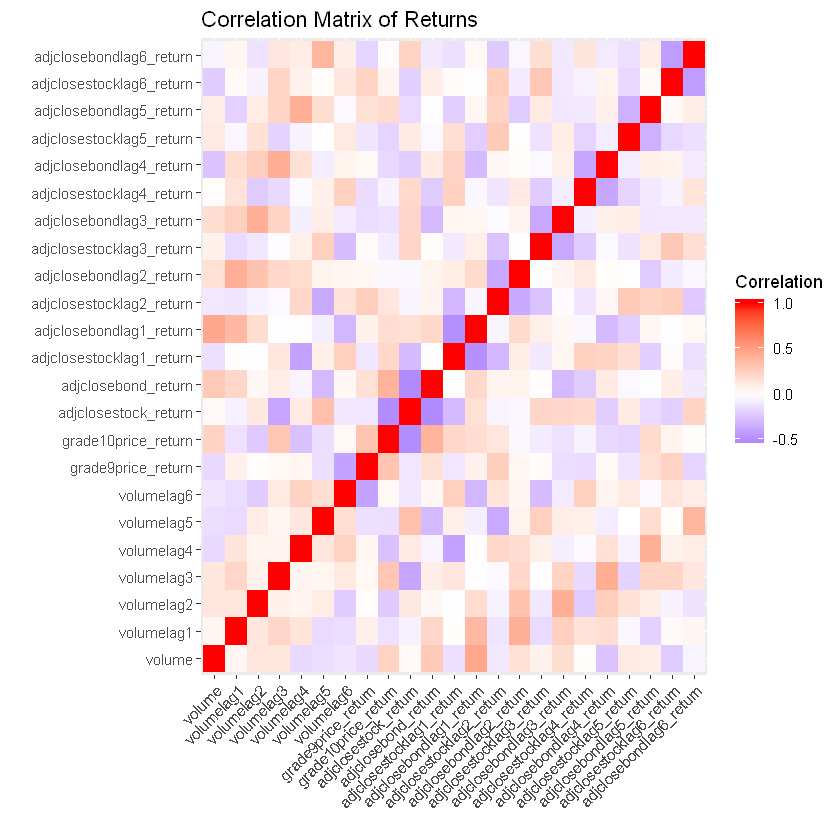

In [2]:
createReturnsCorrelationMatrix <- function(df) {
  # Load necessary libraries
  library(ggplot2)
  library(reshape2)
  
  # Use a simplified pattern to include both "_return" columns and any "volume" columns
  pattern <- "_return|volume"
  selected_columns <- grep(pattern, names(df), value = TRUE)
  
  # Calculate the correlation matrix for the selected columns
  correlation_matrix <- cor(df[, selected_columns], use = "complete.obs")
  
  # Print the correlation matrix to the console
  print(correlation_matrix)
  
  # Melt the correlation matrix for visualization
  melted_correlation_matrix <- melt(correlation_matrix)
  
  # Create the ggplot object for the correlation matrix
  plot <- ggplot(data = melted_correlation_matrix, aes(x=Var1, y=Var2, fill=value)) +
    geom_tile() +
    scale_fill_gradient2(midpoint=0, low="blue", high="red", mid="white") +
    theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
    labs(x='', y='', title='Correlation Matrix of Returns', fill='Correlation')
  
  # Explicitly print the ggplot object to ensure it's displayed
  print(plot)
  
  # Return the correlation matrix as well
  return(correlation_matrix)
}

# Assuming your adjusted dataset is in 'df'
# Example usage:
correlation_matrix <- createReturnsCorrelationMatrix(df)


## VAR model - try later - if enough time...

In [8]:
#install.packages('vars', type = 'binary')
library(vars)

# Assuming 'data_var_subset' is a dataframe with the relevant variables for VAR model
data_var_subset <- df[c("grade10price", "adjclosestock")]

# Determine optimal number of lags
var1.select <- VARselect(data_var_subset, lag.max=6, type="const")
var1.select$selection

# Once you have the optimal number of lags, you can fit the VAR model
#optimal_lags <- var1.select$selection["AIC"]  # Choosing based on AIC, for example
#var_model <- VAR(data_var_subset, p=optimal_lags, type="const")

# Now, 'var_model' contains your fitted VAR model with the optimal lag length


AIC(n)  HQ(n)  SC(n) FPE(n) 
     1      1      1      1

## Visualisation

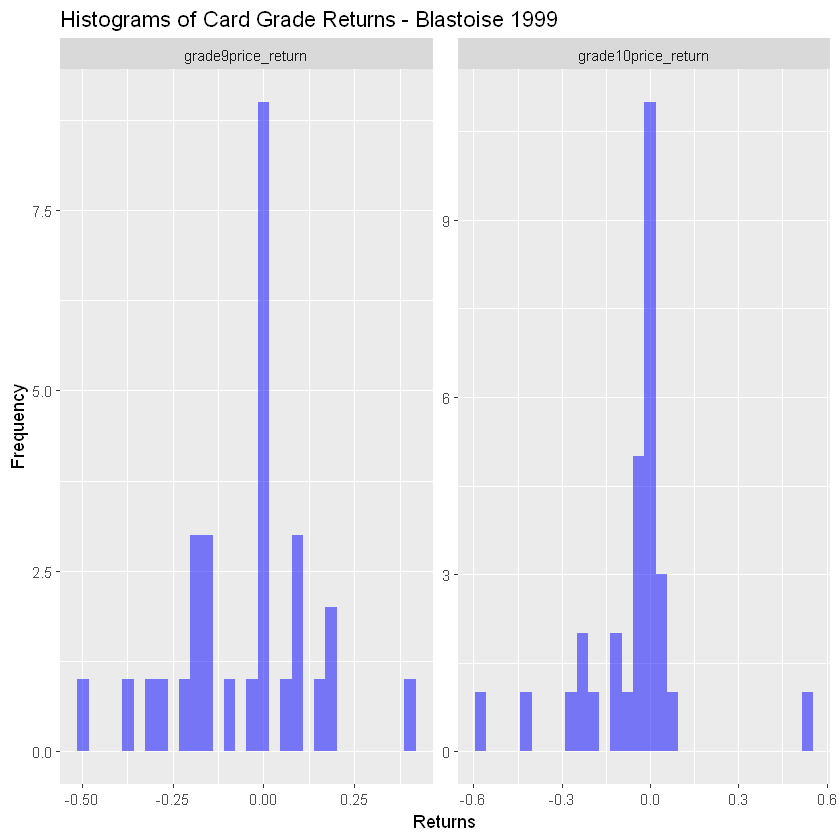

In [4]:

#create a long format data frame suitable for faceting with returns
long_df <- reshape2::melt(df, id.vars = "date", measure.vars = grade_returns)

#histograms for card grade returns
p1 <- ggplot(long_df, aes(x = value)) +
  geom_histogram(bins = 30, fill = "blue", alpha = 0.5) +
  facet_wrap(~ variable, scales = "free") +
  labs(x = "Returns", y = "Frequency", title = "Histograms of Card Grade Returns - Blastoise 1999")

print(p1)

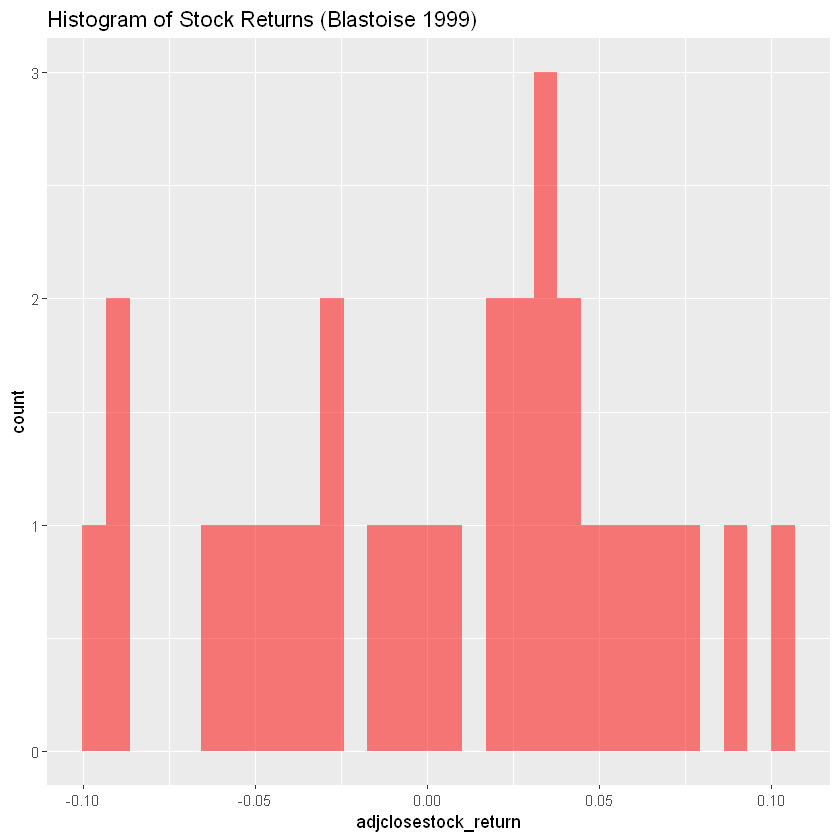

In [5]:
#histogram of stock returns
p2 <- ggplot(df, aes(x = adjclosestock_return)) +
  geom_histogram(bins = 30, fill = "red", alpha = 0.5) +
  labs(title = "Histogram of Stock Returns (Blastoise 1999)")

print(p2)

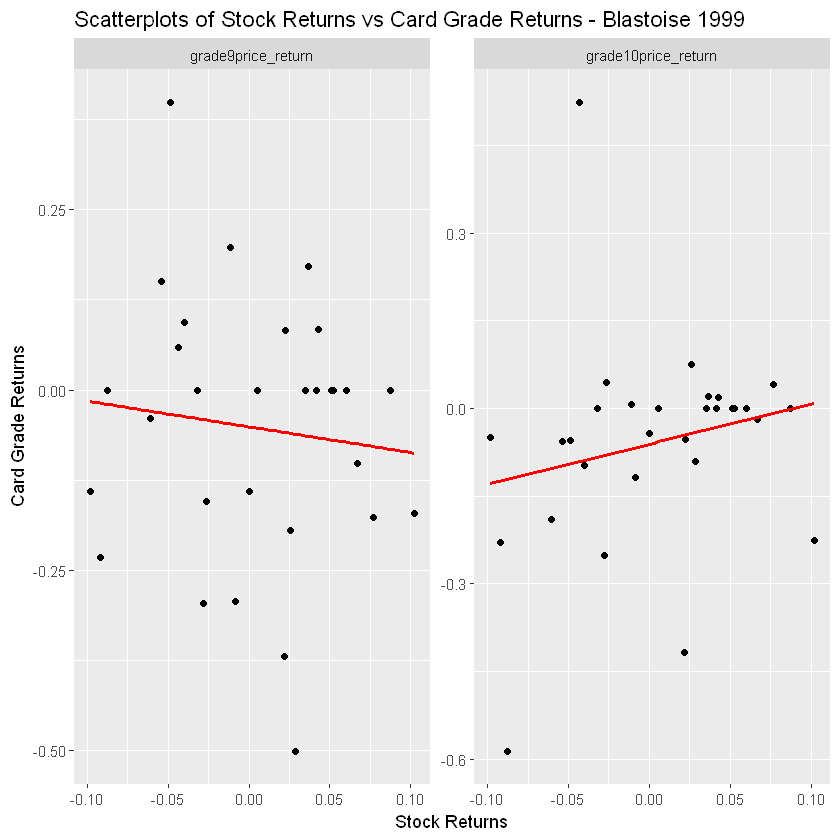

In [6]:
#a long format data frame suitable for scatterplots with returns
long_df <- reshape2::melt(df, id.vars = c("date", "adjclosestocklag1_return"), measure.vars = grade_returns) #ADJUST FOR DIFFERENT LAGS

#scatterplots between stock returns and card grades returns
p3 <- ggplot(long_df, aes(x = adjclosestocklag1_return, y = value)) +
  geom_point() +
  geom_smooth(method = "lm", se = FALSE, color = "red") +
  facet_wrap(~ variable, scales = "free") +
  labs(x = "Stock Returns", y = "Card Grade Returns", title = "Scatterplots of Stock Returns vs Card Grade Returns - Blastoise 1999")

print(p3)

## Choose the variables using AIC

In [7]:

# Load necessary library
library(stats)

# Preparing the initial full model with the dependent variable (choosing one of the grade prices as an example)
# and all potential independent variables (using returns and lagged returns)
# Note: Adjust 'grade5price' to the specific grade price return you are analyzing
full_model <- lm(grade10price_return ~ adjclosestock_return + adjclosebond_return +
                 adjclosestocklag1_return + adjclosebondlag1_return +
                 adjclosestocklag2_return + adjclosebondlag2_return +
                 adjclosestocklag3_return + adjclosebondlag3_return +
                 adjclosestocklag4_return + adjclosebondlag4_return +
                 adjclosestocklag5_return + adjclosebondlag5_return +
                 adjclosestocklag6_return + adjclosebondlag6_return +
                 volume + volumelag1 + volumelag2 + volumelag3 + 
                 volumelag4 + volumelag5 + volumelag6, data = df)

# Perform backward elimination based on AIC
reduced_model <- step(full_model, direction = "backward")

# Display the summary of the reduced model to see the selected variables and their coefficients
summary(reduced_model)


Start:  AIC=-109.87
grade10price_return ~ adjclosestock_return + adjclosebond_return + 
    adjclosestocklag1_return + adjclosebondlag1_return + adjclosestocklag2_return + 
    adjclosebondlag2_return + adjclosestocklag3_return + adjclosebondlag3_return + 
    adjclosestocklag4_return + adjclosebondlag4_return + adjclosestocklag5_return + 
    adjclosebondlag5_return + adjclosestocklag6_return + adjclosebondlag6_return + 
    volume + volumelag1 + volumelag2 + volumelag3 + volumelag4 + 
    volumelag5 + volumelag6

                           Df Sum of Sq     RSS      AIC
- adjclosebondlag3_return   1  0.000018 0.17767 -111.870
- adjclosestocklag6_return  1  0.000043 0.17770 -111.866
- adjclosebondlag5_return   1  0.000747 0.17840 -111.748
- adjclosestock_return      1  0.001618 0.17927 -111.601
- volumelag5                1  0.004094 0.18175 -111.190
- volumelag4                1  0.004891 0.18255 -111.059
- volume                    1  0.005657 0.18331 -110.933
- volumelag3           


Call:
lm(formula = grade10price_return ~ adjclosebond_return + adjclosestocklag1_return + 
    adjclosebondlag1_return + adjclosestocklag2_return + adjclosebondlag2_return + 
    adjclosestocklag3_return + adjclosestocklag4_return + adjclosebondlag4_return + 
    adjclosestocklag5_return + adjclosebondlag6_return + volumelag1 + 
    volumelag2 + volumelag3 + volumelag6, data = df)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.184605 -0.037921 -0.003139  0.046978  0.205006 

Coefficients:
                           Estimate Std. Error t value Pr(>|t|)    
(Intercept)               8.225e-01  5.198e-01   1.582 0.134459    
adjclosebond_return       7.024e-01  2.762e-01   2.543 0.022489 *  
adjclosestocklag1_return  2.668e+00  5.989e-01   4.455 0.000463 ***
adjclosebondlag1_return   9.076e-01  3.826e-01   2.372 0.031476 *  
adjclosestocklag2_return  1.743e+00  5.586e-01   3.120 0.007031 ** 
adjclosebondlag2_return   5.117e-01  3.278e-01   1.561 0.139330    
adjclosest

## Models

### OLS

In [67]:
#OLS
ols_model <- lm(grade10price_return ~ adjclosestocklag1_return + 
    adjclosebondlag3_return + log(volumelag3)  , data = df) 

print(summary(ols_model))

library(car)

# Calculate VIF
vif_result <- vif(ols_model)
print(vif_result)

library(lmtest)

# Perform the Breusch-Pagan test
bp_test <- bptest(ols_model)

# Print the test results
print(bp_test)



Call:
lm(formula = grade10price_return ~ adjclosestocklag1_return + 
    adjclosebondlag3_return + log(volumelag3), data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.74879 -0.11544  0.00362  0.10559  0.89234 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)   
(Intercept)               -7.2267     4.1598  -1.737  0.08645 . 
adjclosestocklag1_return  -1.0015     0.6166  -1.624  0.10850   
adjclosebondlag3_return   -1.1364     0.3355  -3.387  0.00113 **
log(volumelag3)            0.2891     0.1654   1.747  0.08466 . 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.2606 on 75 degrees of freedom
Multiple R-squared:  0.1754,	Adjusted R-squared:  0.1424 
F-statistic: 5.317 on 3 and 75 DF,  p-value: 0.002238

adjclosestocklag1_return  adjclosebondlag3_return          log(volumelag3) 
                1.016533                 1.001760                 1.017718 

	studentized Breusch-Pagan test

data

### Quantile regression

In [69]:
#Quantile regression
library(quantreg)

quantile_model <- rq(grade10price_return ~ adjclosestocklag1_return + adjclosebondlag3_return + log(volumelag3) , data = df, tau = seq(from=0.05, to=0.95, by=0.05))  #change tau for different quantiles
                                                                                                                                   

#print summary of quantile regression models
for(grade_return in grade_returns) {
  #print(paste("Summary of quantile regression model for:", grade_return))
  #print(summary(quantile_models[[grade_return]]))
}

#uncomment the last two commented rows (in the previous loop) if you want to see the results for quantiles from 0.05 to 0.95, by 0.05 step




#### Results for different quantiles of the grade 10 prices x OLS estimates (red line) 

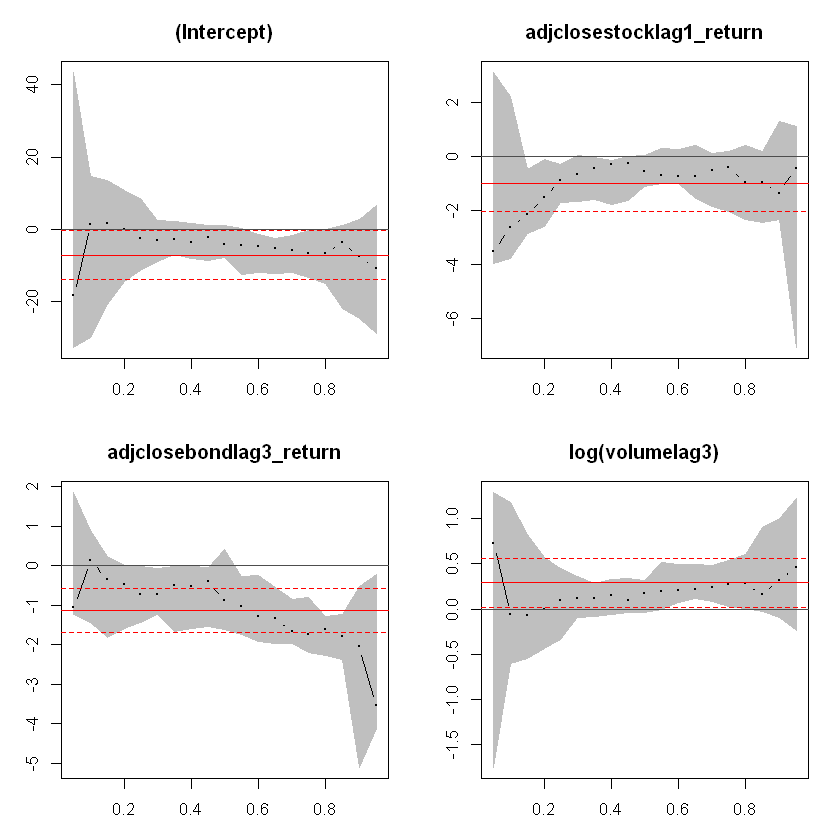

In [72]:

plot(summary(quantile_model))
